In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("Bank_dataset.csv")

In [64]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272,3055.05,3065.15,220.13,260.13,2.0,0.0,...,6.0,0.0,2.000000,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712,12122,12124.75,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.000000,12,12,0.0,0.000000,0.000000,UPW,08-10-2016
2,3,1,17943I70372,535,1398,1398,900.13,900.13,3.0,0.0,...,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241,21.228,21.228,159.42,159.42,41.0,0.0,...,6.0,0.0,2.000000,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947,150.6193333,150.6193333,1098.9,1098.9,4.0,0.0,...,6.0,0.0,7.000000,42,6,0.0,2.333333,2.333333,UPW,6/22/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189996,189997,0,18013I82733,234,1200,1200,5072.4,5474.34,3.0,0.0,...,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,UPW,07-07-2016
189997,189998,1,91352I85340,1260,82293.59,82600.7,6612.94,7250.94,3.0,0.0,...,12.0,0.0,4.000000,36,12,0.0,1.500000,1.666667,UPW,7/29/2016
189998,189999,1,87635I84452,1457,5477,9574.42,1730.83,3614.71,7.0,0.0,...,6.0,0.0,2738.998602,24,6,0.0,0.000000,5.000000,UPW,8/15/2016
189999,190000,0,58569I90588,555,6229.698667,6256.37,4059.07,11634.55,14.0,0.0,...,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,UPW,7/22/2016


# EDA (Exploratory Data Analysis)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190001 entries, 0 to 190000
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            190001 non-null  int64  
 1   label                 190001 non-null  int64  
 2   msisdn                190001 non-null  object 
 3   aon                   190001 non-null  object 
 4   daily_decr30          190001 non-null  object 
 5   daily_decr90          190001 non-null  object 
 6   rental30              190001 non-null  object 
 7   rental90              190001 non-null  object 
 8   last_rech_date_ma     190001 non-null  float64
 9   last_rech_date_da     190001 non-null  float64
 10  last_rech_amt_ma      190001 non-null  int64  
 11  cnt_ma_rech30         190001 non-null  int64  
 12  fr_ma_rech30          190001 non-null  float64
 13  sumamnt_ma_rech30     190001 non-null  float64
 14  medianamnt_ma_rech30  190001 non-null  float64
 15  

In [66]:
from sklearn import preprocessing

for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
#There are 8 columns having object data type so to normalize everything we have to encode it

In [67]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [68]:
df.dropna(axis=0, inplace=True)

In [69]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,36863,1619,66420,71272,43764,54926,2.0,0.0,1539,...,6.0,0.0,2.000000,12,6,0.0,29.000000,29.000000,0,61
1,1,130352,2897,13879,14791,68613,73304,20.0,0.0,5787,...,12.0,0.0,1.000000,12,12,0.0,0.000000,0.000000,0,33
2,1,30815,2030,21703,23304,115637,122044,3.0,0.0,1539,...,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,0,79
3,1,95440,1575,45493,48964,27633,28359,41.0,0.0,947,...,6.0,0.0,2.000000,12,6,0.0,0.000000,0.000000,0,5
4,1,6331,4046,26368,28314,8350,8538,4.0,0.0,2309,...,6.0,0.0,7.000000,42,6,0.0,2.333333,2.333333,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189996,0,30941,1508,13340,14247,85512,94993,3.0,0.0,770,...,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,0,18
189997,1,156064,324,122650,130150,99605,110292,3.0,0.0,8000,...,12.0,0.0,4.000000,36,12,0.0,1.500000,1.666667,0,70
189998,1,149668,540,97948,139461,31897,72251,7.0,0.0,1539,...,6.0,0.0,2738.998602,24,6,0.0,0.000000,5.000000,0,75
189999,0,100071,2121,105728,112456,73615,11598,14.0,0.0,10000,...,6.0,0.0,1.000000,6,6,0.0,0.000000,0.000000,0,63


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190001 entries, 0 to 190000
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 190001 non-null  int64  
 1   msisdn                190001 non-null  int32  
 2   aon                   190001 non-null  int32  
 3   daily_decr30          190001 non-null  int32  
 4   daily_decr90          190001 non-null  int32  
 5   rental30              190001 non-null  int32  
 6   rental90              190001 non-null  int32  
 7   last_rech_date_ma     190001 non-null  float64
 8   last_rech_date_da     190001 non-null  float64
 9   last_rech_amt_ma      190001 non-null  int64  
 10  cnt_ma_rech30         190001 non-null  int64  
 11  fr_ma_rech30          190001 non-null  float64
 12  sumamnt_ma_rech30     190001 non-null  float64
 13  medianamnt_ma_rech30  190001 non-null  float64
 14  medianmarechprebal30  190001 non-null  float64
 15  

In [71]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,...,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.000000,190001.0,190001.000000
mean,0.875069,85270.725217,1683.871143,65316.089794,69271.361809,59162.409308,62477.849601,3735.346070,3731.710966,2065.118510,...,276.634790,0.054160,18.364699,23.639181,6.701870,0.046289,3.401179,4.322936,0.0,38.416561
std,0.330641,49255.348868,1166.977473,40116.751685,42222.377190,35811.027943,37955.784318,53814.346634,53558.030669,2375.847873,...,4267.364414,0.218396,223.312555,26.503844,2.102752,0.201153,8.836749,10.318272,0.0,22.277468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,42587.000000,639.000000,30165.000000,32522.000000,28151.000000,29175.000000,1.000000,0.000000,770.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.0,19.000000
50%,1.000000,85233.000000,1656.000000,65219.000000,69573.000000,58545.000000,62301.000000,3.000000,0.000000,1539.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,0.0,39.000000
75%,1.000000,127901.000000,2406.000000,100243.000000,105641.000000,90050.000000,95489.000000,7.000000,0.000000,2309.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,0.0,57.000000
max,1.000000,170611.000000,4313.000000,134589.000000,142615.000000,121342.000000,128186.000000,997717.809600,999171.809400,55000.000000,...,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,0.0,81.000000


In [72]:
df.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
label,1.000000,0.001469,-0.000769,0.125272,0.123467,0.065514,0.059455,0.003078,0.002682,0.130805,...,0.000295,0.044759,0.004201,0.199722,0.084151,0.036027,0.048064,0.048983,NaN,0.068474
msisdn,0.001469,1.000000,-0.003930,-0.001055,0.000275,0.001808,0.000527,-0.000303,0.001140,-0.003252,...,-0.000437,0.001941,0.001933,0.001384,0.004112,0.002030,0.002940,0.001731,NaN,0.000317
aon,-0.000769,-0.003930,1.000000,-0.000189,0.000712,0.004605,0.000150,0.002681,0.002658,-0.012129,...,-0.003058,-0.006153,0.002102,-0.002874,-0.017631,-0.006656,0.015813,0.025340,NaN,-0.003697
daily_decr30,0.125272,-0.001055,-0.000189,1.000000,0.903334,0.034339,0.011280,-0.000937,-0.004137,0.029835,...,0.003685,0.005323,-0.002439,-0.007515,-0.037809,0.002464,0.047477,0.045297,NaN,0.058654
daily_decr90,0.123467,0.000275,0.000712,0.903334,1.000000,0.025918,0.015727,-0.000903,-0.002547,0.036819,...,0.002374,0.003970,-0.000451,0.007766,-0.028619,0.001827,0.045538,0.043477,NaN,0.058548
rental30,0.065514,0.001808,0.004605,0.034339,0.025918,1.000000,0.712503,-0.000888,-0.001175,-0.023137,...,0.000228,-0.008615,0.000672,0.061250,0.017526,-0.014862,0.034321,0.038038,NaN,0.012909
rental90,0.059455,0.000527,0.000150,0.011280,0.015727,0.712503,1.000000,-0.001667,-0.001469,-0.016439,...,0.000493,-0.009777,0.002705,0.060708,0.019096,-0.016742,0.027970,0.030008,NaN,0.008839
last_rech_date_ma,0.003078,-0.000303,0.002681,-0.000937,-0.000903,-0.000888,-0.001667,1.000000,0.001002,0.000102,...,0.000535,0.002246,0.000326,0.002368,-0.000835,0.003654,-0.001790,-0.001634,NaN,0.000510
last_rech_date_da,0.002682,0.001140,0.002658,-0.004137,-0.002547,-0.001175,-0.001469,0.001002,1.000000,0.000353,...,0.000943,0.000044,-0.002847,0.000055,0.001906,-0.002535,0.000313,0.000870,NaN,-0.000737
last_rech_amt_ma,0.130805,-0.003252,-0.012129,0.029835,0.036819,-0.023137,-0.016439,0.000102,0.000353,1.000000,...,0.001117,0.028081,-0.000060,0.014030,0.148354,0.021031,-0.027908,-0.015397,NaN,0.066125


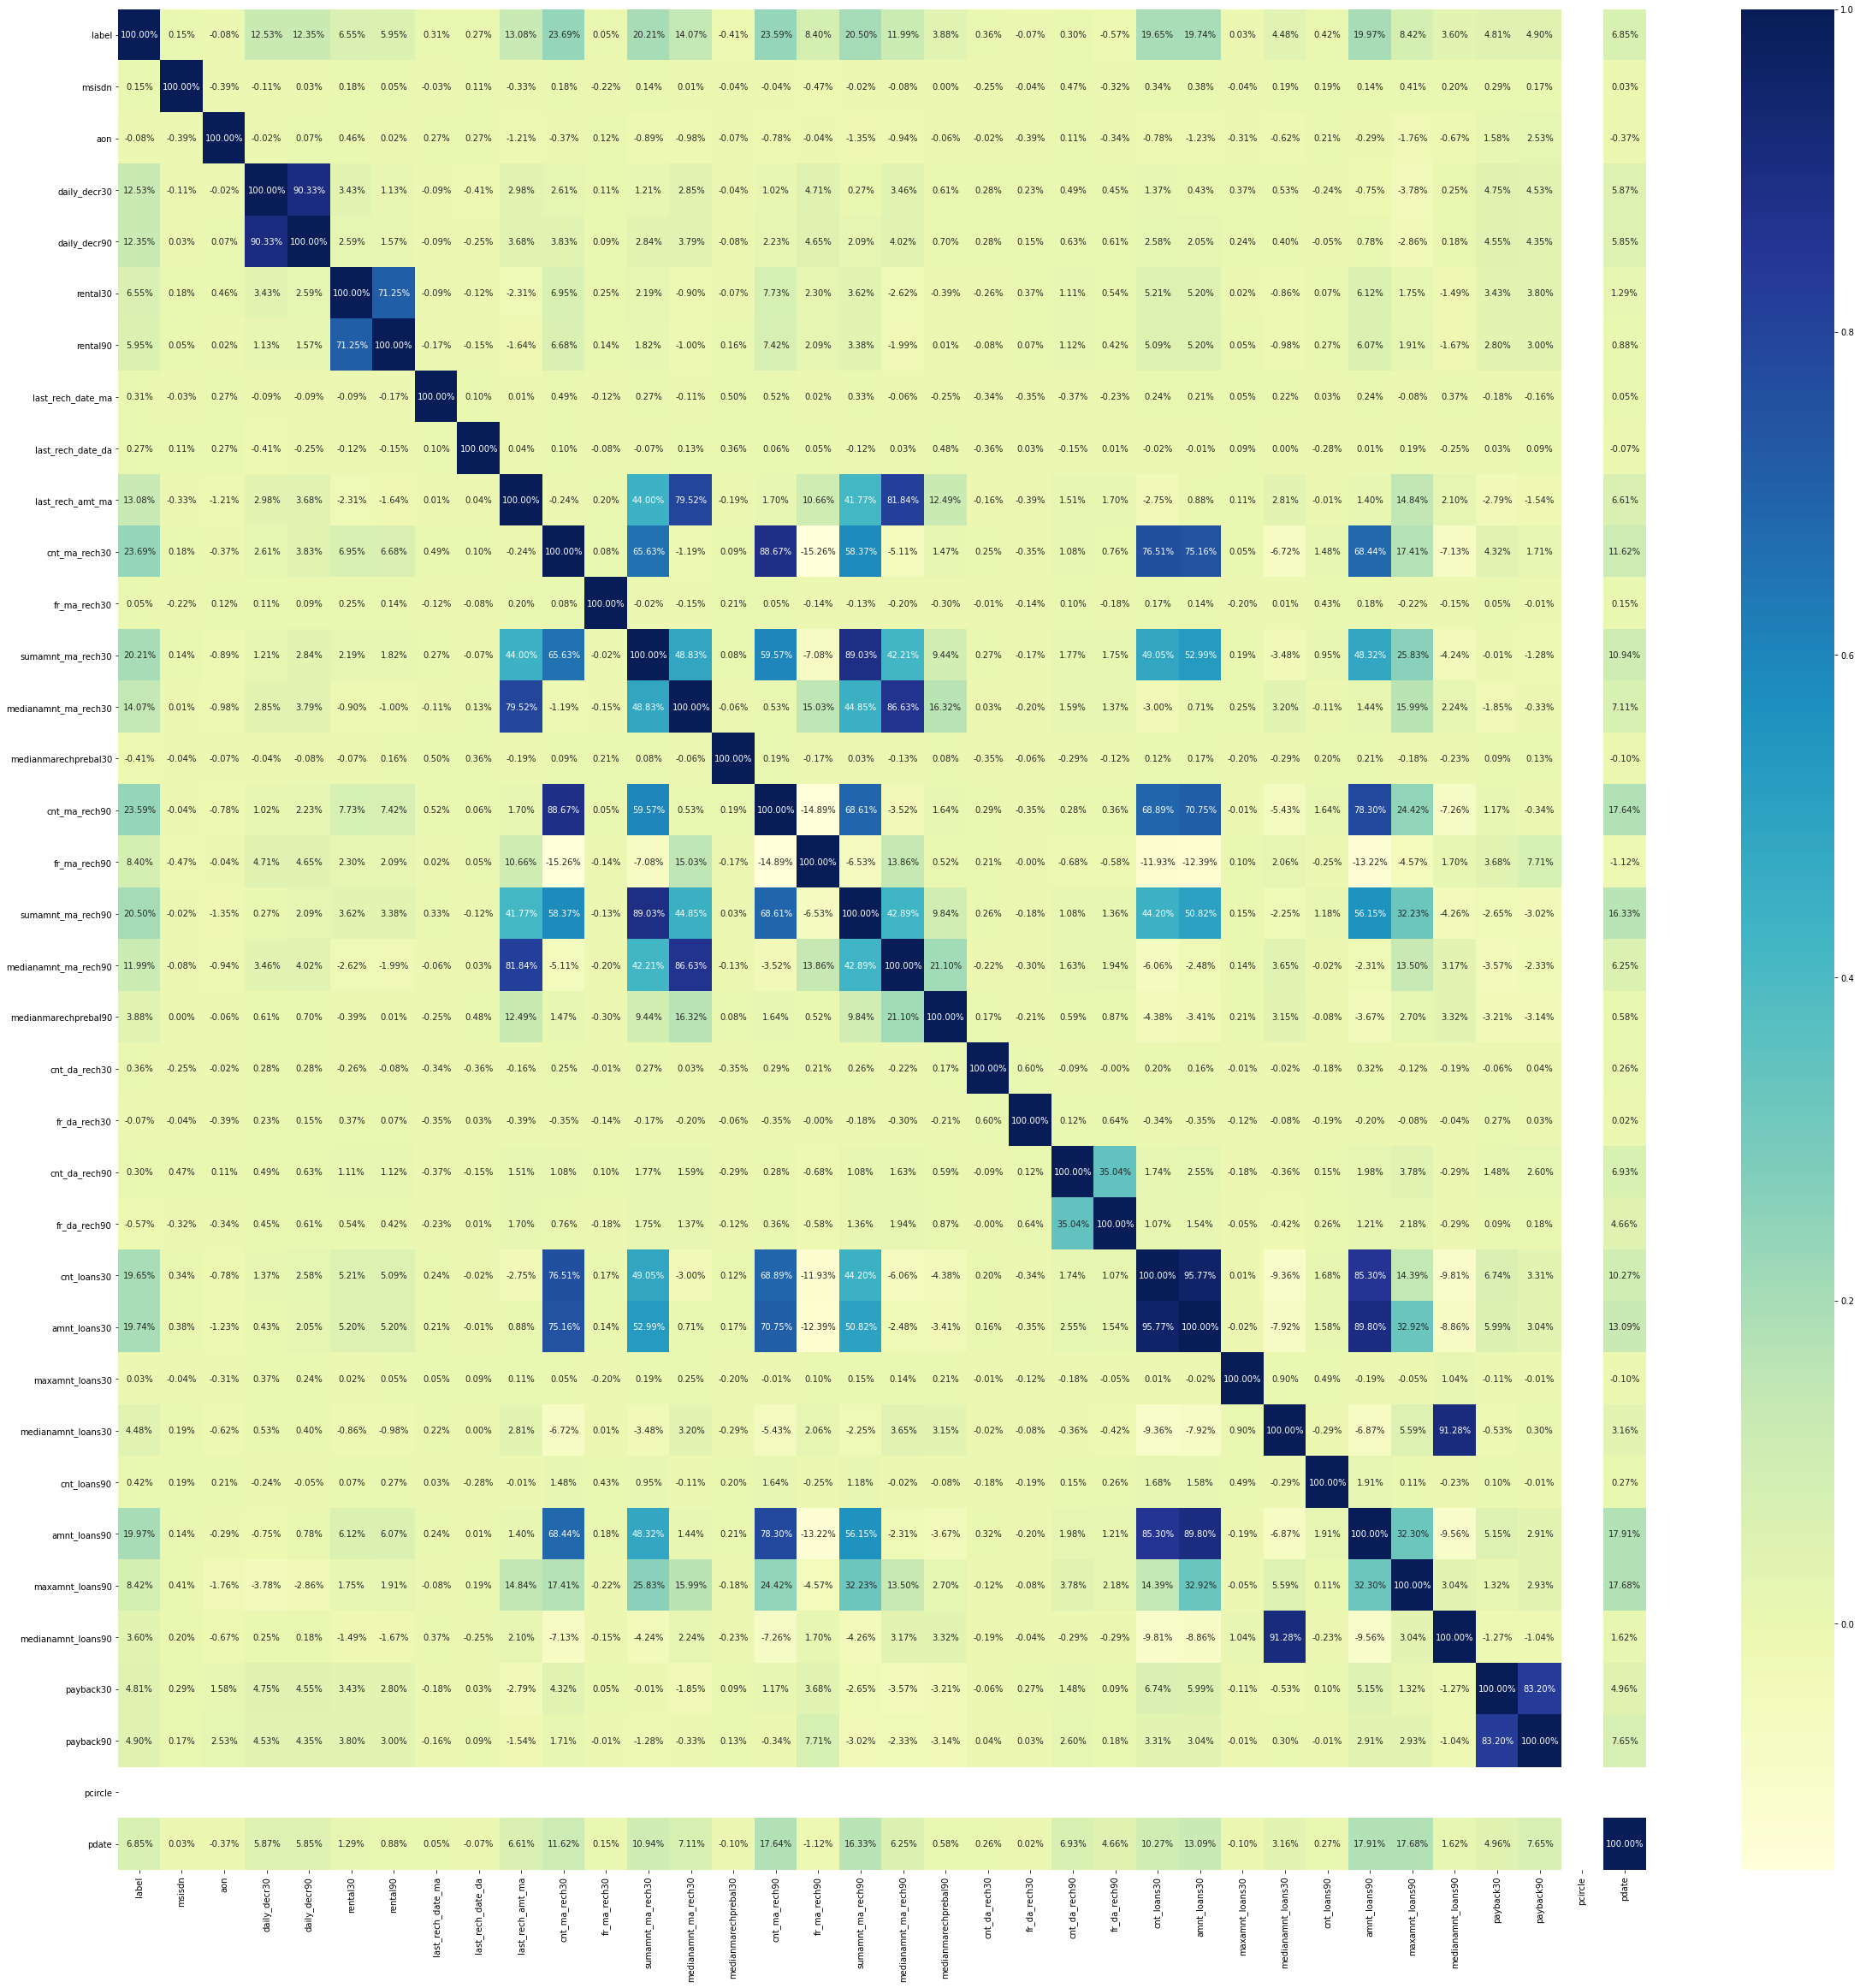

In [73]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot = True, fmt='.2%', cmap="YlGnBu")
plt.show()

In [74]:
df.isnull().sum().max()

0

In [75]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [76]:
len(df.columns)

36

# Preprocessing

In [77]:
x = df.iloc[:,1:] 
y = df.iloc[:,0]
#x = df.drop("label", axis=1)
#y = df["label"]

In [78]:
y

0         0
1         1
2         1
3         1
4         1
         ..
189996    0
189997    1
189998    1
189999    0
190000    1
Name: label, Length: 190001, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [80]:
x_train

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
109179,86878,1303,23075,27668,75145,105040,10.0,0.0,1539,3,...,0.0,0.0,0.0,0,0,0.0,0.000000,0.000000,0,30
107902,126739,2897,131017,139145,41899,55831,7.0,0.0,1539,1,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,17
79716,127869,3887,7756,8146,14156,14601,7.0,0.0,1547,2,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,4
9535,160709,688,131179,139052,115489,121890,2.0,0.0,1539,8,...,6.0,0.0,6.0,36,6,0.0,3.333333,3.333333,0,47
68707,32658,3775,8412,9078,100308,107896,3.0,0.0,770,10,...,6.0,0.0,3.0,18,6,0.0,3.000000,3.000000,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,165492,1674,13783,14697,55769,59453,1.0,0.0,7526,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,39
103694,131341,3673,85542,91465,41215,43164,-15.0,0.0,773,1,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,41
131932,114387,1605,63902,68542,4159,6941,1.0,0.0,2309,2,...,6.0,0.0,2.0,12,6,0.0,13.000000,13.000000,0,23
146867,108009,1498,120438,127804,47220,50058,4.0,0.0,773,1,...,6.0,0.5,2.0,12,6,0.5,0.000000,0.000000,0,2


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Data Visualization

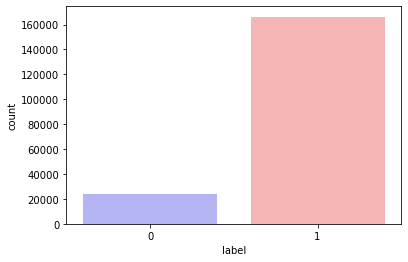

In [82]:
sns.countplot(x="label", data=df, palette="bwr")
plt.show()

In [83]:
#DataFrame.loc attribute is used to return the value present in the ‘balance’ column corresponding to the ‘rental30’ column label.
#column[rental30] is the label and balance group is created to assign a group of values to each balance group to plot a bar plot
for column in [df]:
    column.loc[column["rental30"] <= 0,  'balance'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 20000), 'balance'] = 'low balance'
    column.loc[(column["rental30"] > 20000) & (column["rental30"] <= 100000), 'balance'] = 'average balance'
    column.loc[(column["rental30"] > 100000), 'balance'] = 'high balance'

In [84]:
#Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.
#With cross tabulation, you can examine relationships within the data that might not be readily apparent when only looking at total survey responses.
count_balance_response_pct = pd.crosstab(df['label'],df['balance']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [85]:
count_balance_response_pct

label,0,1
balance,,
average balance,11.346836,88.653164
high balance,10.848375,89.151625
low balance,17.904847,82.095153
no balance,0.000000,100.000000


In [86]:
bal = pd.DataFrame(df['balance'].value_counts())
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance',axis = 1,inplace = True)
bal

,% Subscription
average balance,88.653164
low balance,82.095153
high balance,89.151625
no balance,100.000000


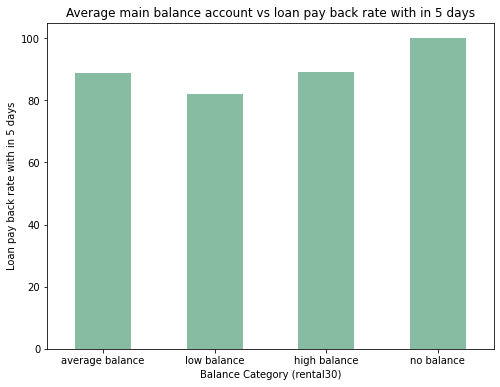

In [87]:
plot_balance = bal['% Subscription'].plot(kind = 'bar', color = '#87BBA2', figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')
plt.show()

In [88]:
for column in [df]:
    column.loc[column["fr_ma_rech30"] <= 0,  'frequency'] = 'no frequency'
    column.loc[(column["fr_ma_rech30"] > 0) & (column["fr_ma_rech30"] <= 1), 'frequency'] = 'low frequency'
    column.loc[(column["fr_ma_rech30"] > 1) & (column["fr_ma_rech30"] <= 2), 'frequency'] = 'average frequency'
    column.loc[(column["fr_ma_rech30"] > 2), 'frequency'] = 'high frequency'

In [89]:
count_frequency_response_pct = pd.crosstab(df['label'],df['frequency']).apply(lambda x: x/x.sum() * 100)
count_frequency_response_pct = count_frequency_response_pct.transpose()

In [90]:
count_frequency_response_pct

label,0,1
frequency,,
average frequency,3.828789,96.171211
high frequency,5.468606,94.531394
low frequency,4.315447,95.684553
no frequency,24.898714,75.101286


In [91]:
freq = pd.DataFrame(df['frequency'].value_counts())
freq['% Subscription'] = count_frequency_response_pct[1]
freq.drop('frequency',axis = 1,inplace = True)
freq

,% Subscription
high frequency,94.531394
no frequency,75.101286
low frequency,95.684553
average frequency,96.171211


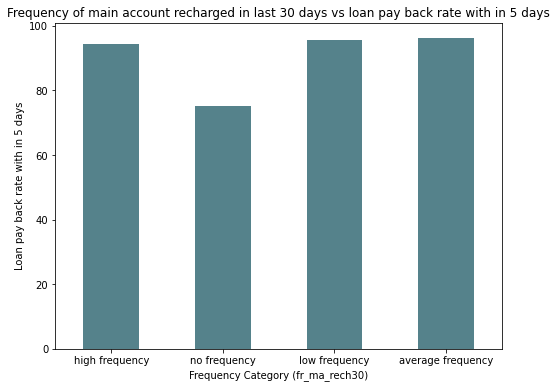

In [92]:
plot_freq = freq['% Subscription'].plot(kind = 'bar', color = '#55828B', figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')
plt.show()

In [93]:
for column in [df]:
    column.loc[column["cnt_loans30"] <= 0,  'loanfrequency'] = 'no loans'
    column.loc[(column["cnt_loans30"] > 0) & (column["cnt_loans30"] <= 1), 'loanfrequency'] = 'low number of loans'
    column.loc[(column["cnt_loans30"] > 1) & (column["cnt_loans30"] <= 2), 'loanfrequency'] = 'average number of loans'
    column.loc[(column["cnt_loans30"] > 2), 'loanfrequency'] = 'high number of loans'

In [94]:
count_loanfrequency_response_pct = pd.crosstab(df['label'],df['loanfrequency']).apply(lambda x: x/x.sum() * 100)
count_loanfrequency_response_pct = count_loanfrequency_response_pct.transpose()

In [95]:
count_loanfrequency_response_pct

label,0,1
loanfrequency,,
average number of loans,8.792966,91.207034
high number of loans,3.017995,96.982005
low number of loans,23.973191,76.026809
no loans,0.000000,100.000000


In [96]:
loanfreq = pd.DataFrame(df['loanfrequency'].value_counts())
loanfreq['% Subscriptionfreq'] = count_loanfrequency_response_pct[1]
loanfreq.drop('loanfrequency',axis = 1,inplace = True)
loanfreq

,% Subscriptionfreq
low number of loans,76.026809
high number of loans,96.982005
average number of loans,91.207034
no loans,100.000000


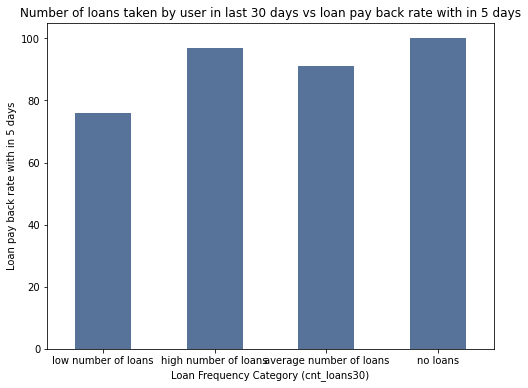

In [97]:
plot_loanfreq = loanfreq['% Subscriptionfreq'].plot(kind = 'bar', color = '#577399', figsize = (8,6))
plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Loan Frequency Category (cnt_loans30)')
plt.xticks(rotation = 'horizontal')
plt.show()

In [98]:
for column in [df]:
    column.loc[column["amnt_loans30"] <= 0,  'loanamount'] = 'no loans'
    column.loc[(column["amnt_loans30"] > 0) & (column["cnt_loans30"] <= 6), 'loanamount'] = 'low number of loans'
    column.loc[(column["amnt_loans30"] > 6) & (column["cnt_loans30"] <= 24), 'loanamount'] = 'average number of loans'
    column.loc[(column["amnt_loans30"] > 24), 'loanamount'] = 'high number of loans'

In [99]:
count_loanamount_response_pct = pd.crosstab(df['label'],df['loanamount']).apply(lambda x: x/x.sum() * 100)
count_loanamount_response_pct = count_loanamount_response_pct.transpose()

In [100]:
count_loanamount_response_pct

label,0,1
loanamount,,
average number of loans,6.523809,93.476191
high number of loans,1.732970,98.267030
low number of loans,25.652649,74.347351
no loans,0.000000,100.000000


In [101]:
loanamt = pd.DataFrame(df['loanamount'].value_counts())
loanamt['% Subscriptionamt'] = count_loanfrequency_response_pct[1]
loanamt.drop('loanamount',axis = 1,inplace = True)
loanamt

,% Subscriptionamt
average number of loans,91.207034
low number of loans,76.026809
high number of loans,96.982005
no loans,100.000000


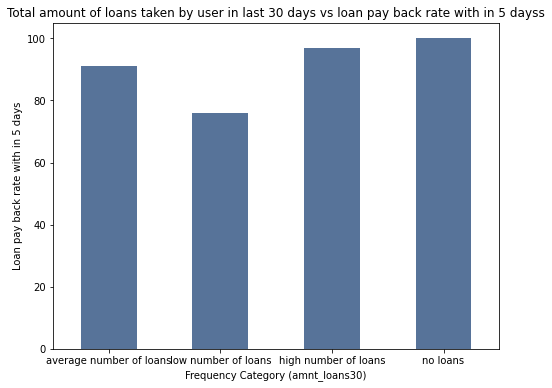

In [102]:
plot_loanamt = loanamt['% Subscriptionamt'].plot(kind = 'bar', color = '#577399', figsize = (8,6))
plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 dayss')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (amnt_loans30)')
plt.xticks(rotation = 'horizontal')
plt.show()

# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = "newton-cg", random_state=0)

In [104]:
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [105]:
y_pred = log_reg.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [107]:
cm = confusion_matrix(y_test, y_pred)

In [108]:
cm

array([[   86,  7816],
       [   56, 54743]], dtype=int64)

In [109]:
tp = cm[0][0]
tn =cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
#check values once again. feels wrong
print("TP = ", tp)
print("TN = ", tn)
print("FP = ", fp)
print("FN = ", fn)

TP =  86
TN =  54743
FP =  7816
FN =  56


In [110]:
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Recall Score:  0.9989780835416705
Precision Score:  0.8750619415271983
Accuracy Score:  0.8744517631297747
F1 Score:  0.9329231922834405


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.01      0.02      7902
           1       0.88      1.00      0.93     54799

    accuracy                           0.87     62701
   macro avg       0.74      0.50      0.48     62701
weighted avg       0.84      0.87      0.82     62701



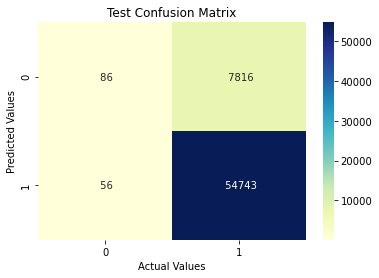

In [112]:
sns.heatmap(cm, annot=True, fmt=" ", cmap="YlGnBu")
plt.title("Test Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

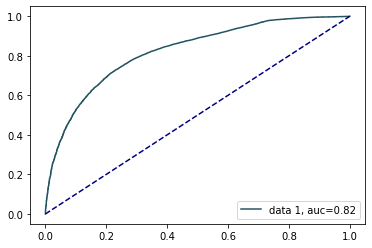

ROC AUC: 0.8219598247476273


In [113]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
lw=2
plt.plot(fpr,tpr,label="data 1, auc=%0.2f" %auc, color="#225560")
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.legend(loc=4)
plt.show()
print("ROC AUC:", auc)

# Random Forest Regression

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier(n_estimators = 35, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=35, random_state=0)

In [116]:
y_pred = rf.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [118]:
cm = confusion_matrix(y_test, y_pred)

In [119]:
cm

array([[ 3678,  4224],
       [  982, 53817]], dtype=int64)

In [120]:
tp = cm[0][0]
tn =cm[1][1]
fp = cm[1][0]
fn = cm[0][1]
print("TP = ", tp)
print("TN = ", tn)
print("FP = ", fp)
print("FN = ", fn)

TP =  3678
TN =  53817
FP =  982
FN =  4224


In [121]:
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Recall Score:  0.9820799649628643
Precision Score:  0.9272238589962268
Accuracy Score:  0.9169710211958342
F1 Score:  0.9538638780574265


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.47      0.59      7902
           1       0.93      0.98      0.95     54799

    accuracy                           0.92     62701
   macro avg       0.86      0.72      0.77     62701
weighted avg       0.91      0.92      0.91     62701



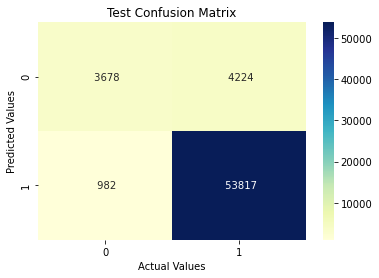

In [123]:
sns.heatmap(cm, annot=True, fmt=" ", cmap="YlGnBu")
plt.title("Test Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

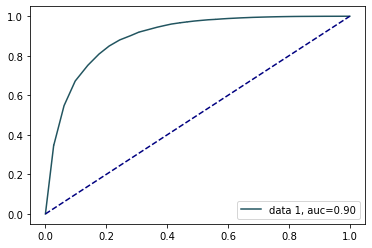

ROC AUC: 0.895886156032763


In [125]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
lw=2
plt.plot(fpr,tpr,label="data 1, auc=%0.2f" %auc, color="#225560")
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.legend(loc=4)
plt.show()
print("ROC AUC:", auc)

# Decision Tree

In [126]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [129]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [131]:
y_pred = dtree.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [133]:
cm = confusion_matrix(y_test, y_pred)

In [134]:
cm

array([[ 4259,  3643],
       [ 3995, 50804]], dtype=int64)

In [135]:
tp = cm[0][0]
tn =cm[1][1]
fp = cm[1][0]
fn = cm[0][1]
print("TP = ", tp)
print("TN = ", tn)
print("FP = ", fp)
print("FN = ", fn)

TP =  4259
TN =  50804
FP =  3995
FN =  3643


In [136]:
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Recall Score:  0.9270972098030986
Precision Score:  0.9330908957334656
Accuracy Score:  0.8781837610245451
F1 Score:  0.930084396682716


In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      7902
           1       0.93      0.93      0.93     54799

    accuracy                           0.88     62701
   macro avg       0.72      0.73      0.73     62701
weighted avg       0.88      0.88      0.88     62701



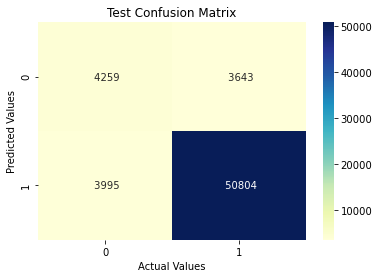

In [138]:
sns.heatmap(cm, annot=True, fmt=" ", cmap="YlGnBu")
plt.title("Test Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

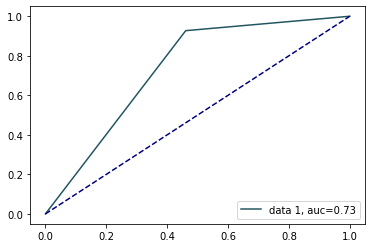

ROC AUC: 0.7330327289973354


In [140]:
y_pred_proba = dtree.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
lw=2
plt.plot(fpr,tpr,label="data 1, auc=%0.2f" %auc, color="#225560")
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.legend(loc=4)
plt.show()
print("ROC AUC:", auc)